In [3]:
import glob
import pandas as pd
import seaborn as sns
import yaml
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt
from matplotlib import colormaps
import statistics

In [4]:
################
# Parameters
################

only_consider_runs_with_minimum_length_of = 5

only_take_the_first_n_iterations = only_consider_runs_with_minimum_length_of

threshold_factor_for_finding_the_best_time_found = 1.02

In [5]:
# go through all files, and collect the best times and the opt times


#file_list = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results_6250k/*/*/*.csv')
file_list = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results_1310k_shorter_runs/*/*/*.csv')
#file_list = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results_175k/*/*/*.csv')

dict_overview_best_time = {}

dict_overview_opt_time = {}

for file in file_list:

    env = file.split("/")[-1].split("\\")[-3]
    algo = file.split("\\")[-2]


    # the names of the transfer algos depend on the excluded environments.
    #if "open_box" in algo : 
    #     if "tlbo_rgpe_prf_exc" in algo : 
    #        algo = "open_box_transfer_exc"

    #if "open_box" in algo : 
    #    if "tlbo_rgpe_prf_all" in algo : 
    #        algo = "open_box_transfer_all"


    #the names of the transfer algorithms differ per environemnt. so map them to a simple name
    if "zero_shot_transfer_exc" in algo : 
        algo = "zero_shot_transfer_exc"
    if "zero_shot_transfer_all" in algo : 
        algo = "zero_shot_transfer_all"
    if "quantile_transfer_exc" in algo : 
        algo = "quantile_transfer_exc"
    if "quantile_transfer_all" in algo : 
        algo = "quantile_transfer_all"
    if "tlbo_rgpe_prf_all" in algo : 
        algo = "tlbo_rgpe_prf_all"
    if "tlbo_sgpr_prf_all" in algo : 
        algo = "tlbo_sgpr_prf_all"
    if "tlbo_topov3_prf_all" in algo : 
        algo = "tlbo_topov3_prf_all"
    if "tlbo_rgpe_gp_all" in algo : 
        algo = "tlbo_rgpe_gp_all"
    if "tlbo_sgpr_gp_all" in algo : 
        algo = "tlbo_sgpr_gp_all"
    if "tlbo_topov3_gp_all" in algo : 
        algo = "tlbo_topov3_gp_all"
    if "tlbo_rgpe_prf_exc" in algo : 
        algo = "tlbo_rgpe_prf_exc"
    if "tlbo_sgpr_prf_exc" in algo : 
        algo = "tlbo_sgpr_prf_exc"
    if "tlbo_topov3_prf_exc" in algo : 
        algo = "tlbo_topov3_prf_exc"
    if "tlbo_rgpe_gp_exc" in algo : 
        algo = "tlbo_rgpe_gp_exc"
    if "tlbo_sgpr_gp_exc" in algo : 
        algo = "tlbo_sgpr_gp_exc"
    if "tlbo_topov3_gp_exc" in algo : 
        algo = "tlbo_topov3_gp_exc"
    if "cost_model_rfs_all" in algo : 
        algo = "cost_model_rfs_all"
    if "cost_model_rfs_exc" in algo : 
        algo = "cost_model_rfs_exc"

    #print(env)
    #print(algo)

    df = pd.read_csv(file)

    df = df[df['time'] > 0]

    #remove runs with too few iterations
    if "cost_model_rfs" not in algo:
        if len(df['time']) < only_consider_runs_with_minimum_length_of:
            continue
    #else:
        #algo = "cost_model_rfs"



    # for comparibility, take the first 24 iteration for all optimization runs
    df = df.head(only_take_the_first_n_iterations)



    # sometimes there are marginal improvments late in the optimization run.
    # this would worsen the optimization time by alot, while barely improving the best time
    # the mitigate this, we take the first time that is within a certain threshold of the overall best time

    
    best_time_found = df['time'].min()

    threshold = best_time_found * threshold_factor_for_finding_the_best_time_found
    
    first_within_threshold_index = df[df['time'] <= threshold].index[0] # first time within threshold
    
    first_within_threshold_time = df.loc[first_within_threshold_index, 'time']

    time_till_best_time_found = df['seconds_since_start_of_opt_run'][first_within_threshold_index]
    
    best_time_found = first_within_threshold_time
    
    
    #best_time_found = df['time'].min()
    
    #best_time_index = df['time'].idxmin()
    
    #time_till_best_time_found = df['seconds_since_start_of_opt_run'][best_time_index]


    

    #print(best_time_found)
    #print(best_time_index)
    #print(time_till_best_time_found)

    if algo not in dict_overview_best_time.keys() :
        dict_overview_best_time[algo] = {}
    if env not in dict_overview_best_time[algo].keys(): 
        dict_overview_best_time[algo][env] = []

    if algo not in dict_overview_opt_time.keys() :
        dict_overview_opt_time[algo] = {}
    if env not in dict_overview_opt_time[algo].keys(): 
        dict_overview_opt_time[algo][env] = []

    dict_overview_best_time[algo][env].append(float(best_time_found))
    dict_overview_opt_time[algo][env].append(float(time_till_best_time_found))
   

In [6]:
# average all best times and all opt times


environments_list = ["S16_C16_N1000", "S16_C8_N100", "S8_C1_N50", "S16_C16_N10000", "S16_C4_N10", "S8_C8_N500", "S2_C2_N20", "S16_C1_N1000", "S16_C1_N10"]

algos_list = ["random_search_syne_tune", 
              "bayesian_open_box", "bayesian_syne_tune", 
              "zero_shot_transfer_exc","zero_shot_transfer_all",
             "quantile_transfer_exc","quantile_transfer_all", "cost_model_rfs_all","cost_model_rfs_exc","tlbo_rgpe_prf_all",
"tlbo_sgpr_prf_all",
"tlbo_topov3_prf_all",
"tlbo_rgpe_gp_all",
"tlbo_sgpr_gp_all",
"tlbo_topov3_gp_all",
"tlbo_rgpe_prf_exc",
"tlbo_sgpr_prf_exc",
"tlbo_topov3_prf_exc",
"tlbo_rgpe_gp_exc",
"tlbo_sgpr_gp_exc",
"tlbo_topov3_gp_exc"]

dict_best_times_avg = {}

for algo in algos_list:

    if algo in dict_overview_best_time.keys():

        for environment in environments_list:

            if environment in dict_overview_best_time[algo].keys():

                if algo not in dict_best_times_avg.keys() :
                    #print(f"adding {algo} as key to dict")
                    dict_best_times_avg[algo] = []
                
                dict_best_times_avg[algo].append(statistics.mean(dict_overview_best_time[algo][environment]))
            
            else:

                if algo not in dict_best_times_avg.keys() :
                    dict_best_times_avg[algo] = []
                
                dict_best_times_avg[algo].append(0)
    else:
        dict_best_times_avg[algo] = [0,0,0,0,0,0,0,0,0]


#print(yaml.dump(dict_best_times_avg))


dict_opt_times_avg = {}

for algo in algos_list:

    if algo in dict_overview_best_time.keys():

        for environment in environments_list:

            if environment in dict_overview_opt_time[algo].keys():

                if algo not in dict_opt_times_avg.keys() :
                    dict_opt_times_avg[algo] = []
                
                dict_opt_times_avg[algo].append(statistics.mean(dict_overview_opt_time[algo][environment]))
            
            else:
                if algo not in dict_opt_times_avg.keys() :
                    dict_opt_times_avg[algo] = []
                    
                dict_opt_times_avg[algo].append(0)
    else:
        dict_opt_times_avg[algo] = [0,0,0,0,0,0,0,0,0]


#print(yaml.dump(dict_opt_times_avg))
            
    

In [7]:
################################
# Data for heuristic optimizer
################################

y_ho_best_time = [35.612375,
        43.532109,
        200.537612,
        33.657328,
        282.683184,
        45.547918,
        200.643825,
        194.539774,
        274.713645]


y_ho_opt_time = [1177.365123,
        1198.242616,
        1359.707448,
        1166.210685,
        3195.257691,
        1181.727674,
        1751.303572,
        1327.74072,
        3187.719483]

dict_opt_times_avg["heuristic"] = y_ho_opt_time
dict_best_times_avg["heuristic"] = y_ho_best_time

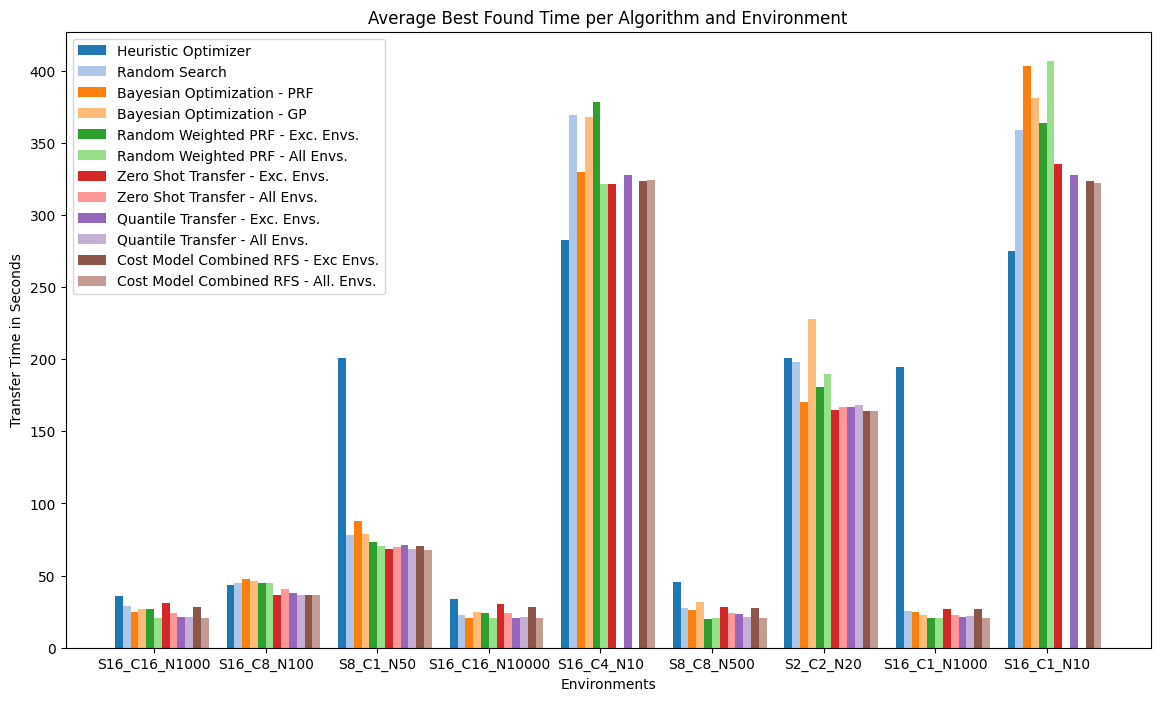

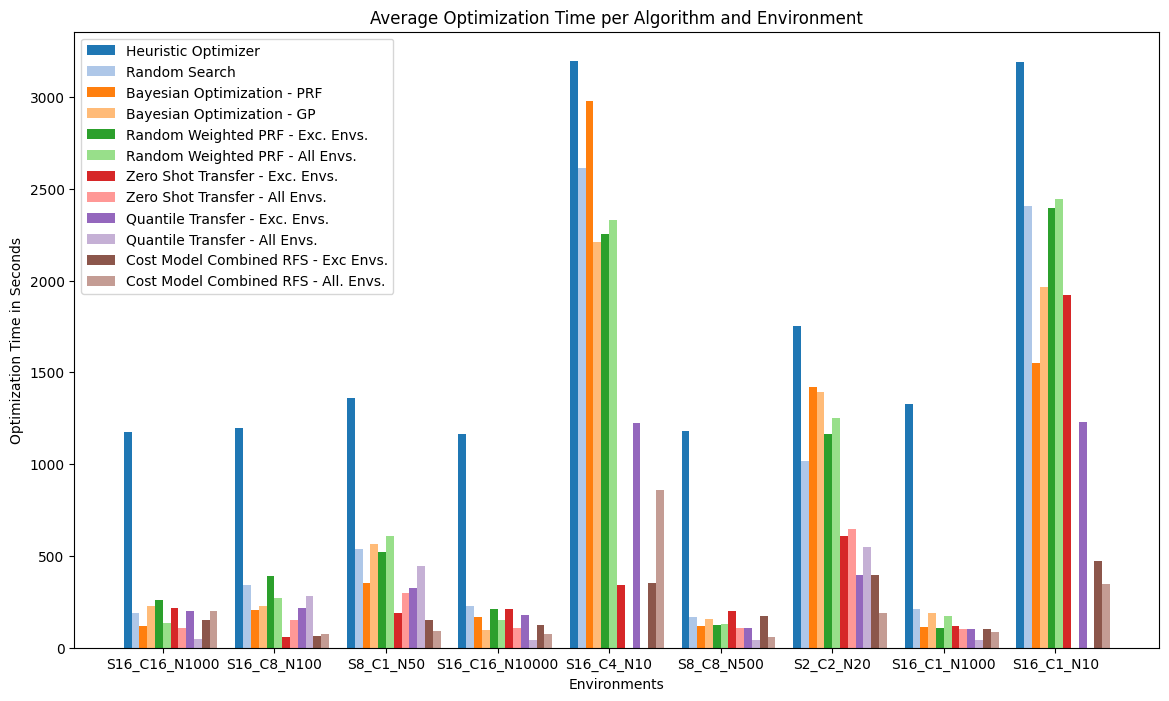

In [8]:

################################
# Plot best time found overall *
################################
# * first time within a few percent of overall best time

x = np.arange(9) # for 9 environments 
cmap = plt.colormaps['tab20']
width = 0.07

x_tick_labels = ["S16_C16_N1000", "S16_C8_N100", "S8_C1_N50", "S16_C16_N10000", "S16_C4_N10", "S8_C8_N500", "S2_C2_N20", "S16_C1_N1000", "S16_C1_N10"]

legend_labels =["Heuristic Optimizer", "Random Search", 
            "Bayesian Optimization - PRF" , "Bayesian Optimization - GP", 
            "Random Weighted PRF - Exc. Envs.", "Random Weighted PRF - All Envs.", 
            "Zero Shot Transfer - Exc. Envs.", "Zero Shot Transfer - All Envs.",
            "Quantile Transfer - Exc. Envs.", "Quantile Transfer - All Envs.", 
                "Cost Model Combined RFS - Exc Envs.",
                "Cost Model Combined RFS - All. Envs."]




plt.figure(figsize=(14, 8))

plt.bar(x-(width * 4.5), dict_best_times_avg["heuristic"], width, color=cmap(0)) 
plt.bar(x-(width * 3.5), dict_best_times_avg["random_search_syne_tune"], width, color=cmap(1)) 

plt.bar(x-(width * 2.5), dict_best_times_avg["bayesian_open_box"], width, color=cmap(2)) 
plt.bar(x-(width * 1.5), dict_best_times_avg["bayesian_syne_tune"], width, color=cmap(3)) 

plt.bar(x-(width * 0.5), dict_best_times_avg["tlbo_rgpe_prf_exc"], width, color=cmap(4)) 
plt.bar(x+(width * 0.5), dict_best_times_avg["tlbo_rgpe_prf_all"], width, color=cmap(5)) 

plt.bar(x+(width * 1.5), dict_best_times_avg["zero_shot_transfer_exc"], width, color=cmap(6)) 
plt.bar(x+(width * 2.5), dict_best_times_avg["zero_shot_transfer_all"], width, color=cmap(7))

plt.bar(x+(width * 3.5), dict_best_times_avg["quantile_transfer_exc"], width, color=cmap(8))
plt.bar(x+(width * 4.5), dict_best_times_avg["quantile_transfer_all"], width, color=cmap(9))

plt.bar(x+(width * 5.5), dict_best_times_avg["cost_model_rfs_exc"], width, color=cmap(10))
plt.bar(x+(width * 6.5), dict_best_times_avg["cost_model_rfs_all"], width, color=cmap(11))

plt.xticks(x, x_tick_labels)
#plt.ylim([0, 250]) 
plt.title("Average Best Found Time per Algorithm and Environment")
plt.xlabel("Environments") 
plt.ylabel("Transfer Time in Seconds") 
plt.legend(legend_labels) 
plt.show() 
#plt.savefig("best_times.png", dpi=300, bbox_inches='tight')




################################
# Plot the optimization time it took to find that *best* time from above
################################

plt.figure(figsize=(14, 8))
# plot data in grouped manner of bar type 

plt.bar(x-(width * 4.5), dict_opt_times_avg["heuristic"], width, color=cmap(0)) 
plt.bar(x-(width * 3.5), dict_opt_times_avg["random_search_syne_tune"], width, color=cmap(1))

plt.bar(x-(width * 2.5), dict_opt_times_avg["bayesian_open_box"], width, color=cmap(2)) 
plt.bar(x-(width * 1.5), dict_opt_times_avg["bayesian_syne_tune"], width, color=cmap(3)) 

plt.bar(x-(width * 0.5), dict_opt_times_avg["tlbo_rgpe_prf_exc"], width, color=cmap(4)) 
plt.bar(x+(width * 0.5), dict_opt_times_avg["tlbo_rgpe_prf_all"], width, color=cmap(5)) 

plt.bar(x+(width * 1.5), dict_opt_times_avg["zero_shot_transfer_exc"], width, color=cmap(6)) 
plt.bar(x+(width * 2.5), dict_opt_times_avg["zero_shot_transfer_all"], width, color=cmap(7))

plt.bar(x+(width * 3.5), dict_opt_times_avg["quantile_transfer_exc"], width, color=cmap(8))
plt.bar(x+(width * 4.5), dict_opt_times_avg["quantile_transfer_all"], width, color=cmap(9))

plt.bar(x+(width * 5.5), dict_opt_times_avg["cost_model_rfs_exc"], width, color=cmap(10))
plt.bar(x+(width * 6.5), dict_opt_times_avg["cost_model_rfs_all"], width, color=cmap(11))


plt.xticks(x, x_tick_labels)
#plt.ylim([0, 2500]) 
plt.title("Average Optimization Time per Algorithm and Environment")
plt.xlabel("Environments") 
plt.ylabel("Optimization Time in Seconds") 
plt.legend(legend_labels) 
plt.show() 
#plt.savefig("opt_times.png", dpi=300, bbox_inches='tight')

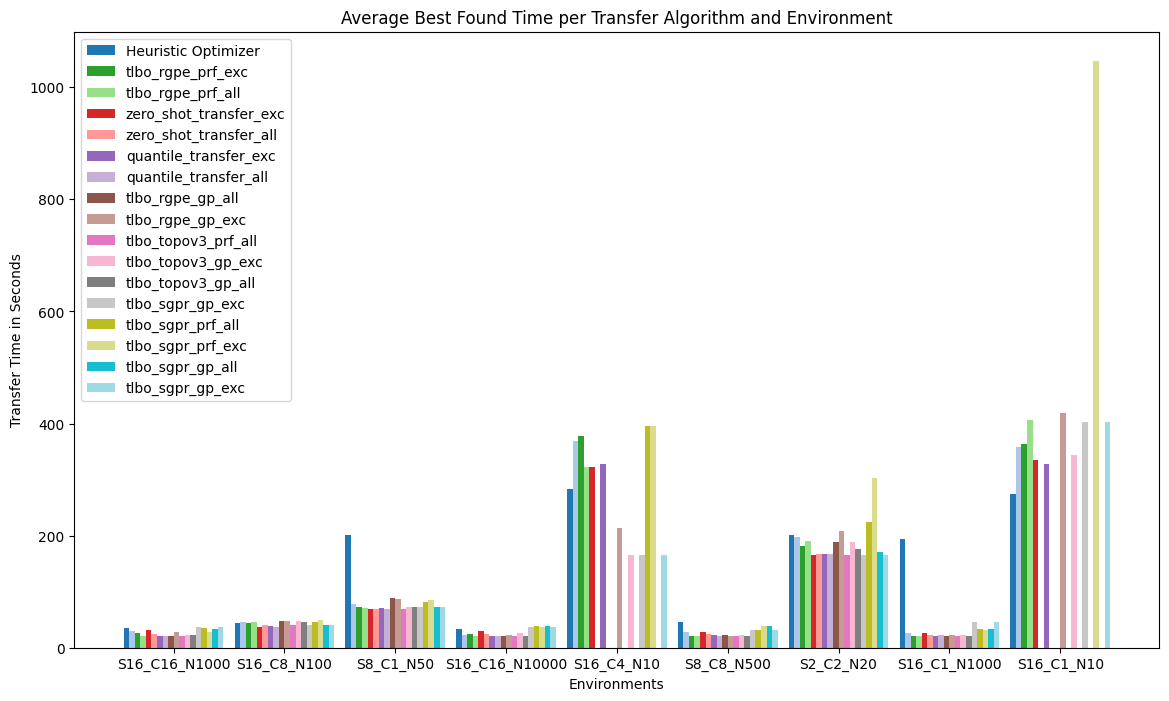

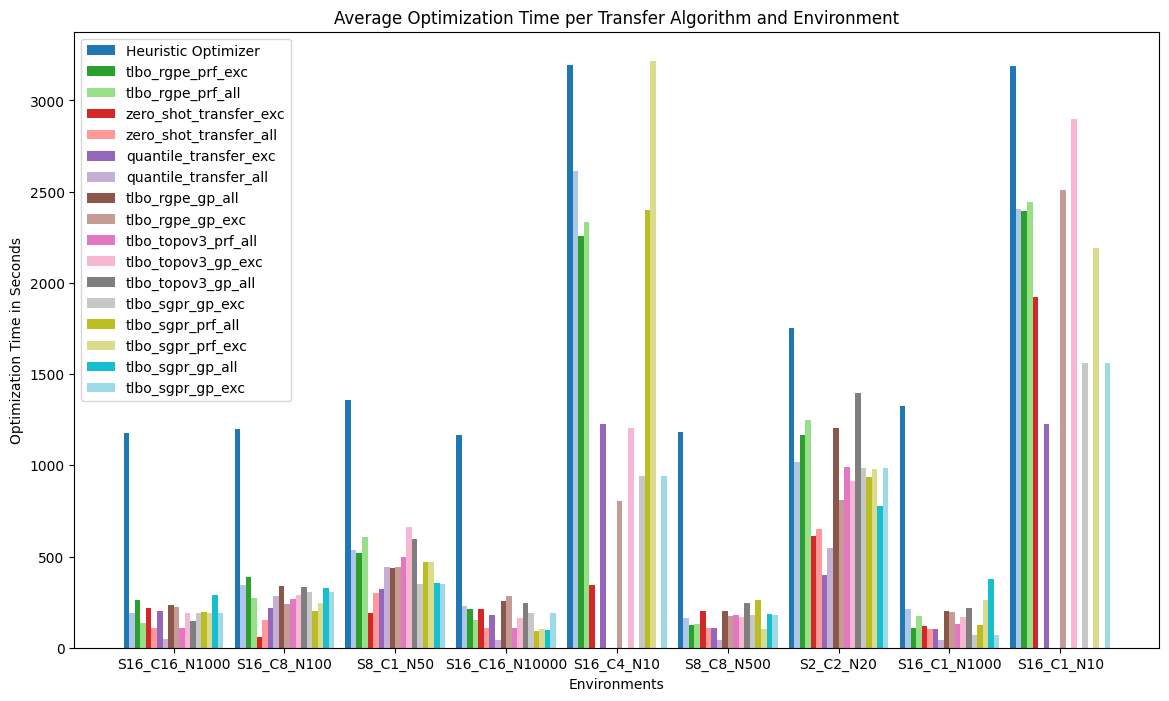

In [9]:

################################
# Plot best time found overall *
################################
# * first time within a few percent of overall best time

x = np.arange(9) # for 9 environments 
cmap = plt.colormaps['tab20']
width = 0.05

x_tick_labels = ["S16_C16_N1000", "S16_C8_N100", "S8_C1_N50", "S16_C16_N10000", "S16_C4_N10", "S8_C8_N500", "S2_C2_N20", "S16_C1_N1000", "S16_C1_N10"]



plt.figure(figsize=(14, 8))

plt.bar(x-(width * 8.5), dict_best_times_avg["heuristic"], width, color=cmap(0), label = "Heuristic Optimizer") 
plt.bar(x-(width * 7.5), dict_best_times_avg["random_search_syne_tune"], width, color=cmap(1), label = "") 

plt.bar(x-(width * 6.5), dict_best_times_avg["tlbo_rgpe_prf_exc"], width, color=cmap(4), label = "tlbo_rgpe_prf_exc") 
plt.bar(x-(width * 5.5), dict_best_times_avg["tlbo_rgpe_prf_all"], width, color=cmap(5), label = "tlbo_rgpe_prf_all") 

plt.bar(x-(width * 4.5), dict_best_times_avg["zero_shot_transfer_exc"], width, color=cmap(6), label = "zero_shot_transfer_exc") 
plt.bar(x-(width * 3.5), dict_best_times_avg["zero_shot_transfer_all"], width, color=cmap(7), label = "zero_shot_transfer_all") 

plt.bar(x-(width * 2.5), dict_best_times_avg["quantile_transfer_exc"], width, color=cmap(8), label = "quantile_transfer_exc") 
plt.bar(x-(width * 1.5),  dict_best_times_avg["quantile_transfer_all"], width, color=cmap(9), label = "quantile_transfer_all")

plt.bar(x-(width * 0.5), dict_best_times_avg["tlbo_rgpe_gp_all"], width, color=cmap(10), label = "tlbo_rgpe_gp_all") 

plt.bar(x+(width * 0.5),  dict_best_times_avg["tlbo_rgpe_gp_exc"], width, color=cmap(11), label = "tlbo_rgpe_gp_exc")

plt.bar(x+(width * 1.5), dict_best_times_avg["tlbo_topov3_prf_all"], width, color=cmap(12), label = "tlbo_topov3_prf_all") 
plt.bar(x+(width * 2.5),  dict_best_times_avg["tlbo_topov3_gp_exc"], width, color=cmap(13), label = "tlbo_topov3_gp_exc")

plt.bar(x+(width * 3.5), dict_best_times_avg["tlbo_topov3_gp_all"], width, color=cmap(14), label = "tlbo_topov3_gp_all")
plt.bar(x+(width * 4.5),  dict_best_times_avg["tlbo_sgpr_gp_exc"], width, color=cmap(15), label = "tlbo_sgpr_gp_exc")

plt.bar(x+(width * 5.5), dict_best_times_avg["tlbo_sgpr_prf_all"], width, color=cmap(16), label = "tlbo_sgpr_prf_all") 
plt.bar(x+(width * 6.5),  dict_best_times_avg["tlbo_sgpr_prf_exc"], width, color=cmap(17), label = "tlbo_sgpr_prf_exc")

plt.bar(x+(width * 7.5), dict_best_times_avg["tlbo_sgpr_gp_all"], width, color=cmap(18), label = "tlbo_sgpr_gp_all") 
plt.bar(x+(width * 8.5),  dict_best_times_avg["tlbo_sgpr_gp_exc"], width, color=cmap(19), label = "tlbo_sgpr_gp_exc")


plt.xticks(x, x_tick_labels)
#plt.ylim([0, 200]) 
plt.title("Average Best Found Time per Transfer Algorithm and Environment")
plt.xlabel("Environments") 
plt.ylabel("Transfer Time in Seconds") 
plt.legend() 
plt.show() 




################################
# Plot the optimization time it took to find that *best* time from above
################################
plt.figure(figsize=(14, 8))
# plot data in grouped manner of bar type 


plt.bar(x-(width * 8.5), dict_opt_times_avg["heuristic"], width, color=cmap(0), label = "Heuristic Optimizer") 
plt.bar(x-(width * 7.5), dict_opt_times_avg["random_search_syne_tune"], width, color=cmap(1), label = "") 

plt.bar(x-(width * 6.5), dict_opt_times_avg["tlbo_rgpe_prf_exc"], width, color=cmap(4), label = "tlbo_rgpe_prf_exc") 
plt.bar(x-(width * 5.5), dict_opt_times_avg["tlbo_rgpe_prf_all"], width, color=cmap(5), label = "tlbo_rgpe_prf_all") 

plt.bar(x-(width * 4.5), dict_opt_times_avg["zero_shot_transfer_exc"], width, color=cmap(6), label = "zero_shot_transfer_exc") 
plt.bar(x-(width * 3.5), dict_opt_times_avg["zero_shot_transfer_all"], width, color=cmap(7), label = "zero_shot_transfer_all") 

plt.bar(x-(width * 2.5), dict_opt_times_avg["quantile_transfer_exc"], width, color=cmap(8), label = "quantile_transfer_exc") 
plt.bar(x-(width * 1.5),  dict_opt_times_avg["quantile_transfer_all"], width, color=cmap(9), label = "quantile_transfer_all")

plt.bar(x-(width * 0.5), dict_opt_times_avg["tlbo_rgpe_gp_all"], width, color=cmap(10), label = "tlbo_rgpe_gp_all") 

plt.bar(x+(width * 0.5),  dict_opt_times_avg["tlbo_rgpe_gp_exc"], width, color=cmap(11), label = "tlbo_rgpe_gp_exc")

plt.bar(x+(width * 1.5), dict_opt_times_avg["tlbo_topov3_prf_all"], width, color=cmap(12), label = "tlbo_topov3_prf_all") 
plt.bar(x+(width * 2.5),  dict_opt_times_avg["tlbo_topov3_gp_exc"], width, color=cmap(13), label = "tlbo_topov3_gp_exc")

plt.bar(x+(width * 3.5), dict_opt_times_avg["tlbo_topov3_gp_all"], width, color=cmap(14), label = "tlbo_topov3_gp_all")
plt.bar(x+(width * 4.5),  dict_opt_times_avg["tlbo_sgpr_gp_exc"], width, color=cmap(15), label = "tlbo_sgpr_gp_exc")

plt.bar(x+(width * 5.5), dict_opt_times_avg["tlbo_sgpr_prf_all"], width, color=cmap(16), label = "tlbo_sgpr_prf_all") 
plt.bar(x+(width * 6.5),  dict_opt_times_avg["tlbo_sgpr_prf_exc"], width, color=cmap(17), label = "tlbo_sgpr_prf_exc")

plt.bar(x+(width * 7.5), dict_opt_times_avg["tlbo_sgpr_gp_all"], width, color=cmap(18), label = "tlbo_sgpr_gp_all") 
plt.bar(x+(width * 8.5),  dict_opt_times_avg["tlbo_sgpr_gp_exc"], width, color=cmap(19), label = "tlbo_sgpr_gp_exc")



plt.xticks(x, x_tick_labels)
#plt.ylim([0, 2000]) 
plt.title("Average Optimization Time per Transfer Algorithm and Environment")
plt.xlabel("Environments") 
plt.ylabel("Optimization Time in Seconds") 
plt.legend() 
plt.show() 

In [10]:
import statistics

#dict_best_times_avg
#print(yaml.dump(dict_opt_times_avg))

#get the random times
# then transform every time as [algo_time] / [rand_time]

random_opt_times = dict_opt_times_avg['random_search_syne_tune']

normalized_opt_times = {}
normalized_opt_times_avg = {}

for algo in dict_opt_times_avg.keys():
    #normalized_opt_times[algo] = dict_opt_times_avg[algo] / random_opt_times
    #normalized_opt_times[algo] = [i / j for i, j in zip(dict_opt_times_avg[algo], random_opt_times)]
    normalized_opt_times[algo] = [i / j if j != 0 else 0 for i, j in zip(dict_opt_times_avg[algo], random_opt_times)]

    #print(f"Algorithm : {algo} , Average Opt Time % : {statistics.mean(normalized_opt_times[algo])}")
    normalized_opt_times_avg[algo] = statistics.mean(normalized_opt_times[algo]) * 100


#print(yaml.dump(normalized_opt_times))

print("\n\n\n")

random_opt_times = dict_best_times_avg['random_search_syne_tune']

normalized_best_times = {}
normalized_best_times_avg = {}

for algo in dict_opt_times_avg.keys():
    #normalized_opt_times[algo] = dict_opt_times_avg[algo] / random_opt_times
    #normalized_best_times[algo] = [i / j for i, j in zip(dict_best_times_avg[algo], random_opt_times)]
    normalized_best_times[algo] = [i / j if j != 0 else 0 for i, j in zip(dict_best_times_avg[algo], random_opt_times)]
    #print(f"Algorithm : {algo} , Average Best Time % : \n {statistics.mean(normalized_best_times[algo])}")
    normalized_best_times_avg[algo] = statistics.mean(normalized_best_times[algo]) * 100




#print(yaml.dump(normalized_best_times))

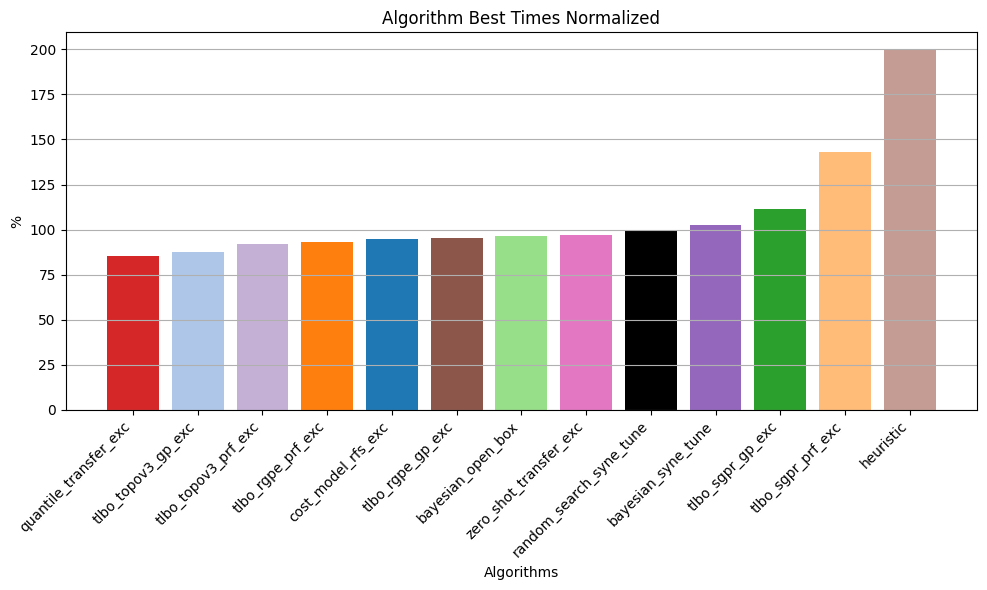

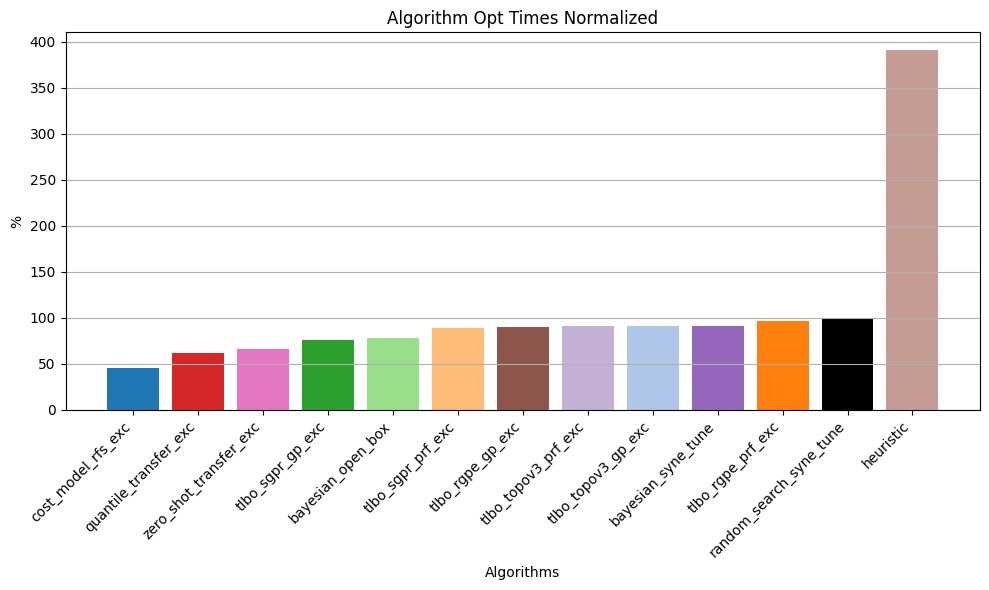

In [11]:
import numpy as np
import colorsys

normalized_best_times_avg = {key: value for key, value in normalized_best_times_avg.items() if 'all' not in key}
normalized_opt_times_avg = {key: value for key, value in normalized_opt_times_avg.items() if 'all' not in key}



sorted_data_best_times = dict(sorted(normalized_best_times_avg.items(), key=lambda item: item[1]))

algorithms_best_times = list(sorted_data_best_times.keys())
performance_values_best_times = list(sorted_data_best_times.values())


sorted_data_opt_times = dict(sorted(normalized_opt_times_avg.items(), key=lambda item: item[1]))

algorithms_opt_times = list(sorted_data_opt_times.keys())
performance_values_opt_times = list(sorted_data_opt_times.values())




unique_algorithms = set(algorithms_best_times).union(algorithms_opt_times)
colors = plt.cm.tab20(range(len(unique_algorithms)))  # Use a colormap
color_mapping = {algorithm: color for algorithm, color in zip(unique_algorithms, colors)}
color_mapping["random_search_syne_tune"] = "black"



plt.figure(figsize=(10, 6))
bar_colors = [color_mapping[alg] for alg in algorithms_best_times]
plt.bar(algorithms_best_times, performance_values_best_times, color=bar_colors)
plt.xlabel("Algorithms")
plt.ylabel("%")
plt.title("Algorithm Best Times Normalized")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(10, 6))
bar_colors = [color_mapping[alg] for alg in algorithms_opt_times]
plt.bar(algorithms_opt_times, performance_values_opt_times, color=bar_colors)
plt.xlabel("Algorithms")
plt.ylabel("%")
plt.title("Algorithm Opt Times Normalized")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [12]:
'''
Explanation: 

Here you can see the best found time* & the time it took to find that time ( optimization time )* for different algorithms.
Each Algorithm (Except Heuristic & Cost Model) was run for 25 iterations / real transfers. For Random & Bayesian the results are averaged over 2 runs. 
For all other only 1 optimization run with 25 iterations was executed. For time reasons some results are missing from environments with Network = 10.


* We actually take the first time that is within 3 percent of the overall best time found, because there
are sometimes marginal improvments late in the optimization run, and this would worsen the optimization time alot
while almost not improving the best time found

* The optimization time is the timestamp after the best found configuration has been actualy executed, because 
we only know afterwards how good that configurations actually is.




The Algorithms:

Dark Blue & Light Blue: Heuristic & Random, the Baselines to beat. Unfortunately, not always the case.
The heuristic optimizer is not 'constrained' to the same search space as the other algorithms. 
This might explain the much better foudn times for environments with network = 10

Oranges: Bayesian Optimization, one with Gaussian Processes and one with Probabilistic Random Forests.


The Transfer Learning Algorithms: 
For each of these Algorithms, we ran them with data for all environments, and without data for all. 
For each Environment we used Random Sampled Configurations with about 300 Samples per Environment
All the way at the end you can see which environments were excluded in the form

Target Environment:
Exc:
Unknown Environments 1
Unknown Environment 2




    Green: Random Weighted Random Forest.
    Originaly  “Ranking-Weighted Gaussian Process Ensemble”, but here with probabilistic random forests as surrogate type. 
    Here each previous task is modeled using the surrogate type. We used random samples and grouped them per environment. 
    So one surrogate model per environment was constructed. The Algorithm then assigns weights to each surrogate model based 
    on the similarity between the current new evaluations and the surrogate models. Then the predictions of the 
    surrogate models are combined by their weight to get the next prediction.
    
    Red : Zero Shot Transfer Learning : 
    First we calculate the rank of each hyperparameter configuration on each previous task. 
    Then we choose configurations in order to minimize the sum of the ranks across the previous tasks. 
    The idea is to speed up optimization by picking configurations with high ranks on previous tasks.
    
    Purple: Quantile-based Hyperparameter Transfer Learning
    We map the hyperparameter evaluations to quantiles for each task. Then we learn a distribution 
    of quantiles given hyperparameters. Finally, we sample from the distribution and evaluate the best sample. 
    The idea is to speed up optimization by searching areas with high-ranking configurations but without enforcing hard limits on the search space.



Brown: Cost Model Combined Random Forest
The Cost Model is supplied with random sample data for all Environments except the current (target) environment for which it should predict.
It then builds one cost model (Random Forest) per known environment. When a prediction is requested (for an unknown environment),
we construct a linear combination of the known environments to best approximate the target environment. Using these weights we
combine the individual predictions of each known-environment cost model.
We query the cost model 300 - 500 times, using random search for maximum exploration. We then take the configuration with the best predicted time
to actually execute. We repeat this only 3 - 5 times. The cost model is not updated with the new results (is a Todo).



Environment Combinations for the Transfer Learning Algorithms:


    environment 1 S16_C16_N1000:
    exc :
    environment 1 S16_C16_N1000
    environment 4 S16_C16_N10000


    environment 2 S16_C8_N100:
    exc :
    environment 2 S16_C8_N100
    environment 5 S16_C4_N10


    environment 3 S8_C1_N50:
    exc :
    environment 3 S8_C1_N50
    environment 8 S16_C1_N1000


    environment 4 S16_C16_N10000:
    exc :
    environment 4 S16_C16_N10000
    environment 1 S16_C16_N1000


    environment 5 S16_C4_N10:
    exc :
    environment 5 S16_C4_N10
    environment 2 S16_C8_N100


    environment 6 S8_C8_N500:
    exc :
    environment 6 S8_C8_N500
    environment 7 S2_C2_N20


    environment 7 S2_C2_N20:
    exc :
    environment 7 S2_C2_N20
    environment 6 S8_C8_N500


    environment 8 S16_C1_N1000:
    exc :
    environment 8 S16_C1_N1000
    environment 3 S8_C1_N50


    environment 9 S16_C1_N10:
    exc :
    environment 9 S16_C1_N10
    environment 3 S8_C1_N50


The search space used (size: 1.31 Mio): 

config_space_variable_parameters_generalized_1310k = \
    [{'name': "compression_lib", 'type': 'categorical', 'domain': ["nocomp", "zstd", "lz4", "lzo", "snappy"]},
     {'name': "bufpool_size", 'type': 'discrete', 'domain': [32, 64, 96, 128]},
     {'name': "buffer_size", 'type': 'discrete', 'domain': [64, 256, 512, 1024]},
     {'name': "send_par", 'type': 'discrete', 'domain': [1, 2, 4, 8]},
     {'name': "write_par", 'type': 'discrete', 'domain': [1, 2, 4, 8]},
     {'name': "decomp_par", 'type': 'discrete', 'domain': [1, 2, 4, 8]},
     {'name': "read_partitions", 'type': 'discrete', 'domain': [1, 2, 4, 8]},
     {'name': "read_par", 'type': 'discrete', 'domain': [1, 2, 4, 8]},
     {'name': "deser_par", 'type': 'discrete', 'domain': [1, 2, 4, 8]},
     {'name': "ser_par", 'type': 'discrete', 'domain': [1]},
     {'name': "comp_par", 'type': 'discrete', 'domain': [1, 2, 4, 8]},
     ]
     
'''


'\nExplanation: \n\nHere you can see the best found time* & the time it took to find that time ( optimization time )* for different algorithms.\nEach Algorithm (Except Heuristic & Cost Model) was run for 25 iterations / real transfers. For Random & Bayesian the results are averaged over 2 runs. \nFor all other only 1 optimization run with 25 iterations was executed. For time reasons some results are missing from environments with Network = 10.\n\n\n* We actually take the first time that is within 3 percent of the overall best time found, because there\nare sometimes marginal improvments late in the optimization run, and this would worsen the optimization time alot\nwhile almost not improving the best time found\n\n* The optimization time is the timestamp after the best found configuration has been actualy executed, because \nwe only know afterwards how good that configurations actually is.\n\n\n\n\nThe Algorithms:\n\nDark Blue & Light Blue: Heuristic & Random, the Baselines to beat. Un